In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./dataset/train_cleaned.csv')
df_train['datetime_iso'] = pd.to_datetime(df_train['datetime_iso'])

df_test = pd.read_csv('./dataset/test_cleaned.csv')
df_test['datetime_iso'] = pd.to_datetime(df_test['datetime_iso'])

In [3]:
df_train.head()

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.0,0.82,320.0,0.00,0,NaN,NaN,100.0
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.0,0.96,338.0,0.00,0,0,0,100.0
2,284004000,1979-01-01 02:00:00+00:00,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.0,1.22,339.0,0.00,volume:zero,NaN,NaN,99.0
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.0,1.08,342.0,0.13,nol,0,NaN,94.0
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.0,0.86,336.0,0.34,nol,NaN,0,100.0


## Drop unnecesarry feature

In [4]:
df_train = df_train.drop(['datetime','time-zone','visibility','sea_level','grnd_level','rain_3h','snow_1h','snow_3h'],axis = 1)
df_test = df_test.drop(['datetime','time-zone','visibility','sea_level','grnd_level','rain_3h','snow_1h','snow_3h'],axis = 1)

In [5]:
df_train.head()

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,1979-01-01 00:00:00+00:00,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.00,100.0
1,1979-01-01 01:00:00+00:00,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,100.0
2,1979-01-01 02:00:00+00:00,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,99.0
3,1979-01-01 03:00:00+00:00,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,94.0
4,1979-01-01 04:00:00+00:00,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,100.0


## Check Null Values

In [6]:
df_train.isna().sum()

datetime_iso       0
temp               0
d_point            0
feels              0
min_temp           0
max_temp           0
prssr              0
hum                0
wind_spd        2226
wind_deg           0
rain_1h            0
clouds             0
dtype: int64

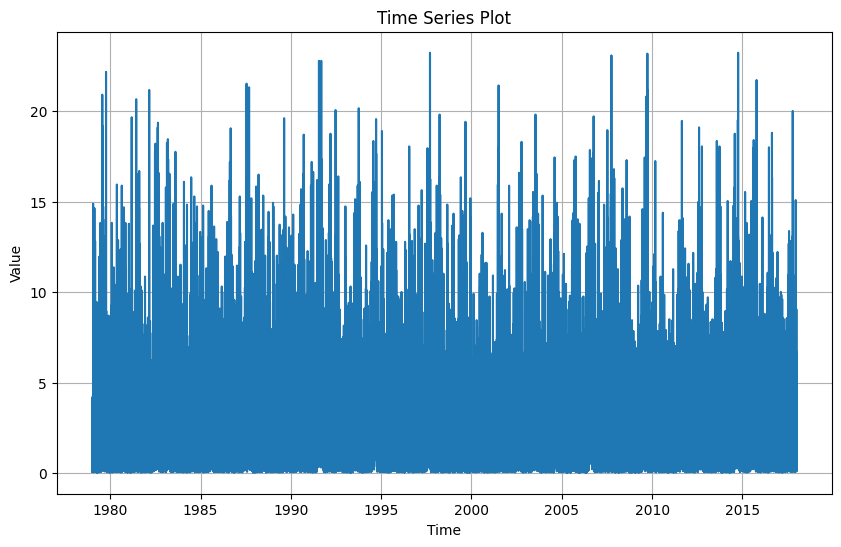

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='datetime_iso', y='wind_spd', data=df_train)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.grid(True)

In [8]:
# Filter and display rows with missing values
rows_with_null = df_train[df_train.isnull().any(axis=1)]

# Print the resulting DataFrame
print(rows_with_null)

                    datetime_iso   temp  d_point  feels  min_temp  max_temp  \
20     1979-01-01 20:00:00+00:00  23.82    23.65  24.84     22.77     24.64   
240    1979-01-11 00:00:00+00:00  24.62    24.28  25.70     23.87     25.22   
317    1979-01-14 05:00:00+00:00  28.36    24.36  32.84     27.94     29.19   
475    1979-01-20 19:00:00+00:00  24.31    23.63  25.30     23.70     25.26   
578    1979-01-25 02:00:00+00:00  29.07    24.18  33.87     28.66     29.81   
...                          ...    ...      ...    ...       ...       ...   
341331 2017-12-09 03:00:00+00:00  30.07    25.81  37.07     29.82     30.45   
341474 2017-12-15 02:00:00+00:00  27.51    24.96  31.68     27.05     28.04   
341534 2017-12-17 14:00:00+00:00  26.89    24.92  30.33     26.17     27.75   
341561 2017-12-18 17:00:00+00:00  25.07    24.21  26.11     24.53     25.86   
341608 2017-12-20 16:00:00+00:00  25.94    25.43  27.12     25.18     29.04   

         prssr   hum  wind_spd  wind_deg  rain_1h  

## Check Outlier

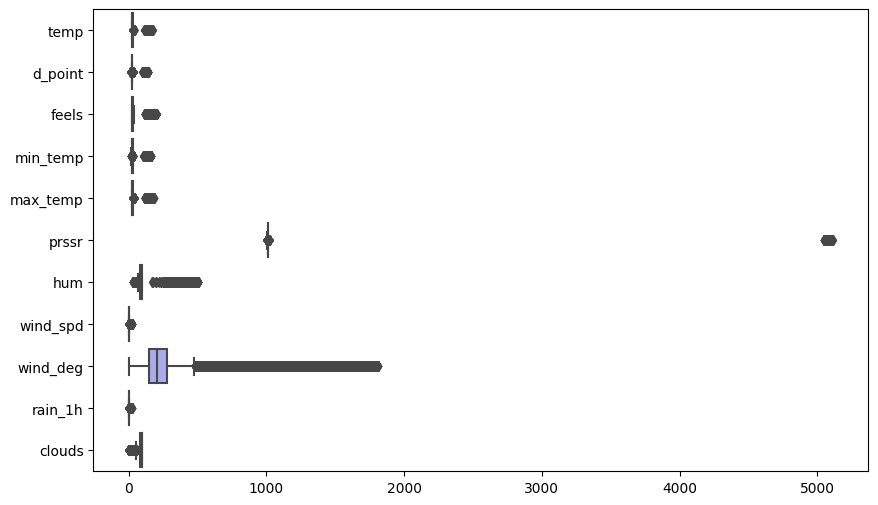

In [9]:
# Create a boxplot for the entire DataFrame
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=df_train, orient="h")  # "orient" specifies horizontal orientation

# Show the plot
plt.show()

## Q-Q Plot for 